In [1]:
import signet_gt.signed_network as sn
import numpy as np
import graph_tool.all as gt
import pandas as pd

# Signed network construction with graph-tool

There are different ways to construct a network:
- adjacency matrix
- edge list

etc etc.

## From the adjacency matrix

In [2]:
# graph builder
graph_build = sn.SignedNetwork()

In [3]:
# let's construct a signed network from Mickey and friends' relationships
df = pd.read_csv('../data/mickey_and_friends.tsv', sep='\t', index_col=0)

display(df)

# adjacency matrix
A = df.values

# nodes names 
characters= list(df.columns)

,Mickey Mouse,Minnie Mouse,Donald Duck,Daisy Duck,Goofy,Pluto,Clarabelle Cow,Pete,The Phantom Blot,Beagle Boys,Trudy
Mickey Mouse,0,1,1,0,1,1,0,-1,-1,-1,0
Minnie Mouse,1,0,1,1,1,1,1,-1,0,0,-1
Donald Duck,1,1,0,1,1,1,0,-1,-1,-1,-1
Daisy Duck,0,1,1,0,1,1,1,0,0,0,-1
Goofy,1,1,1,1,0,1,1,-1,-1,-1,-1
Pluto,1,1,1,1,1,0,1,-1,-1,-1,0
Clarabelle Cow,0,1,0,1,1,1,0,0,0,0,-1
Pete,-1,-1,-1,0,-1,-1,0,0,1,1,1
The Phantom Blot,-1,0,-1,0,-1,-1,0,1,0,1,1
Beagle Boys,-1,0,-1,0,-1,-1,0,1,1,0,1


In [4]:
def check_if_directed(A):
    """
    check if the adj. matrix is symmetric
    if A symm., the network is undirected
    if A not symm., the network is directed

    """
    A = np.array(A)
    return not np.allclose(A, A.T)

In [5]:
# let's create the graph
g = graph_build.graph_construction(repre = A,
                                   repre_type = 'adj',
                                   is_directed =  check_if_directed(A),
                                   nodes_id = characters)

In [6]:
print(f'nodes IDs: {list(g.get_vertices())}')
print(f'nodes names: {list(g.vp.node_id)}')
print(f'number of edges: {len(g.get_edges())}')

nodes IDs: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
nodes names: ['Mickey Mouse', 'Minnie Mouse', 'Donald Duck', 'Daisy Duck', 'Goofy', 'Pluto', 'Clarabelle Cow', 'Pete', 'The Phantom Blot', 'Beagle Boys', 'Trudy']
number of edges: 42


In [7]:
deg = g.degree_property_map('total')
deg.a = 5* deg.a

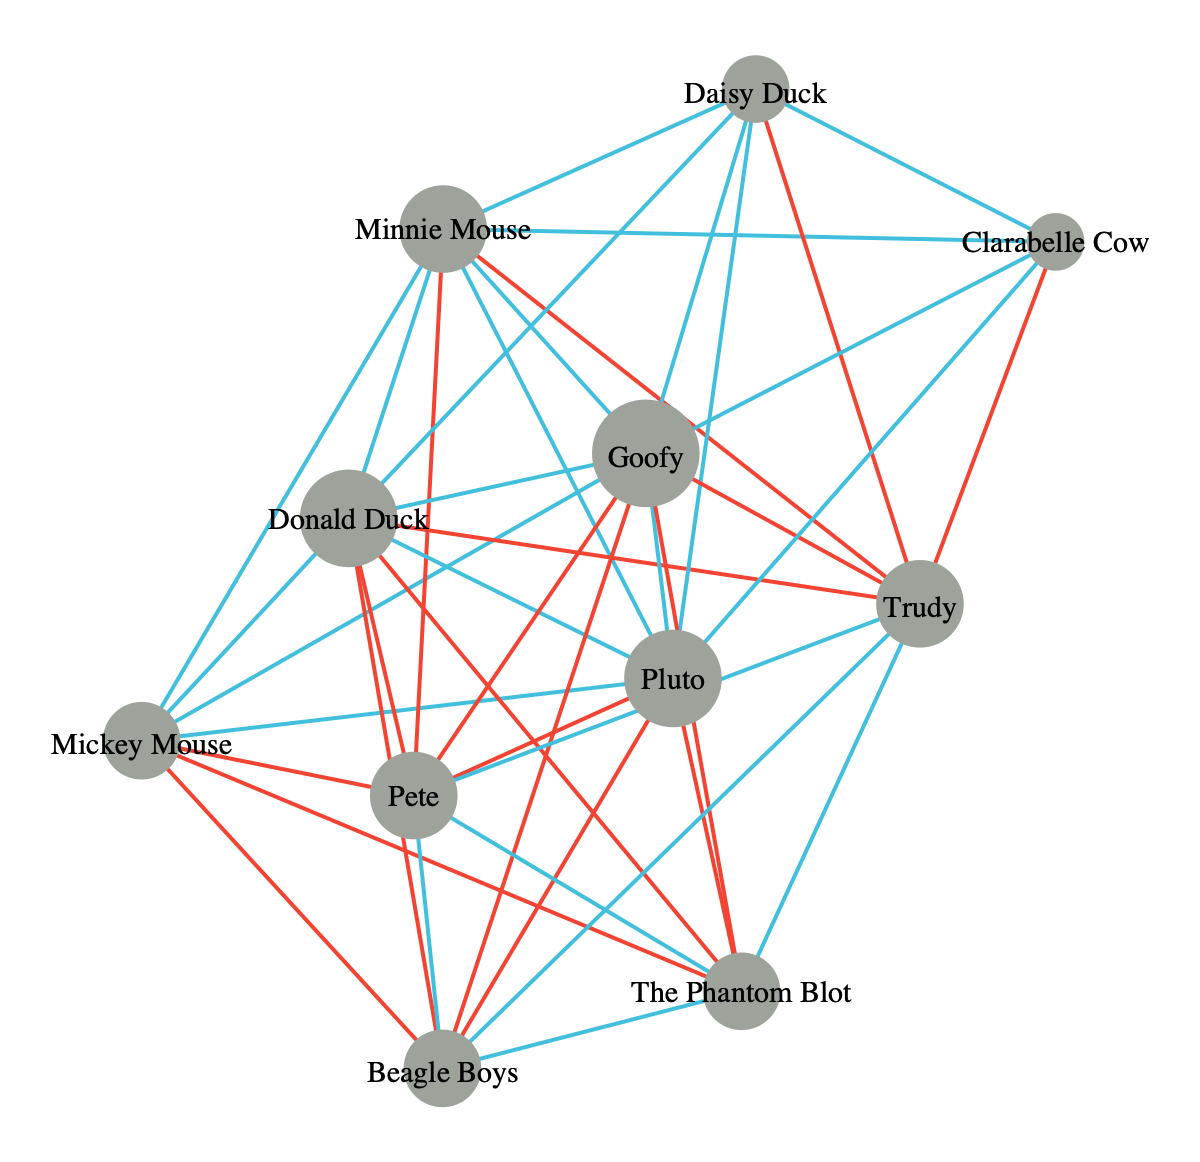

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x17fe587d0, at 0x287bc4a10>

In [8]:
pos = gt.sfdp_layout(g)
gt.graph_draw(g,
              pos = pos,
              vertex_text = g.vp.node_id, 
              edge_color = g.ep.color, 
              vertex_size = deg,
              edge_pen_width = 2,
              vertex_text_position = -.5,
              vertex_font_size = 15,
              vertex_fill_color = '#9DA39A', 
              vertex_color = '#9DA39A')

## From the edge list

In [9]:
un_A = np.triu(A)
edgelist = np.argwhere(un_A != 0).tolist()
edge_weights = un_A[un_A.nonzero()]

In [10]:
graph_build_el = sn.SignedNetwork()

In [11]:
# let's create the graph
g_el = graph_build_el.graph_construction(repre = edgelist,
                                   repre_type = 'edgelist',
                                   is_directed = check_if_directed(A),
                                   weights = edge_weights,
                                   nodes_id = characters)

In [12]:
deg_el = g_el.degree_property_map('total')
deg_el.a = 5* deg_el.a

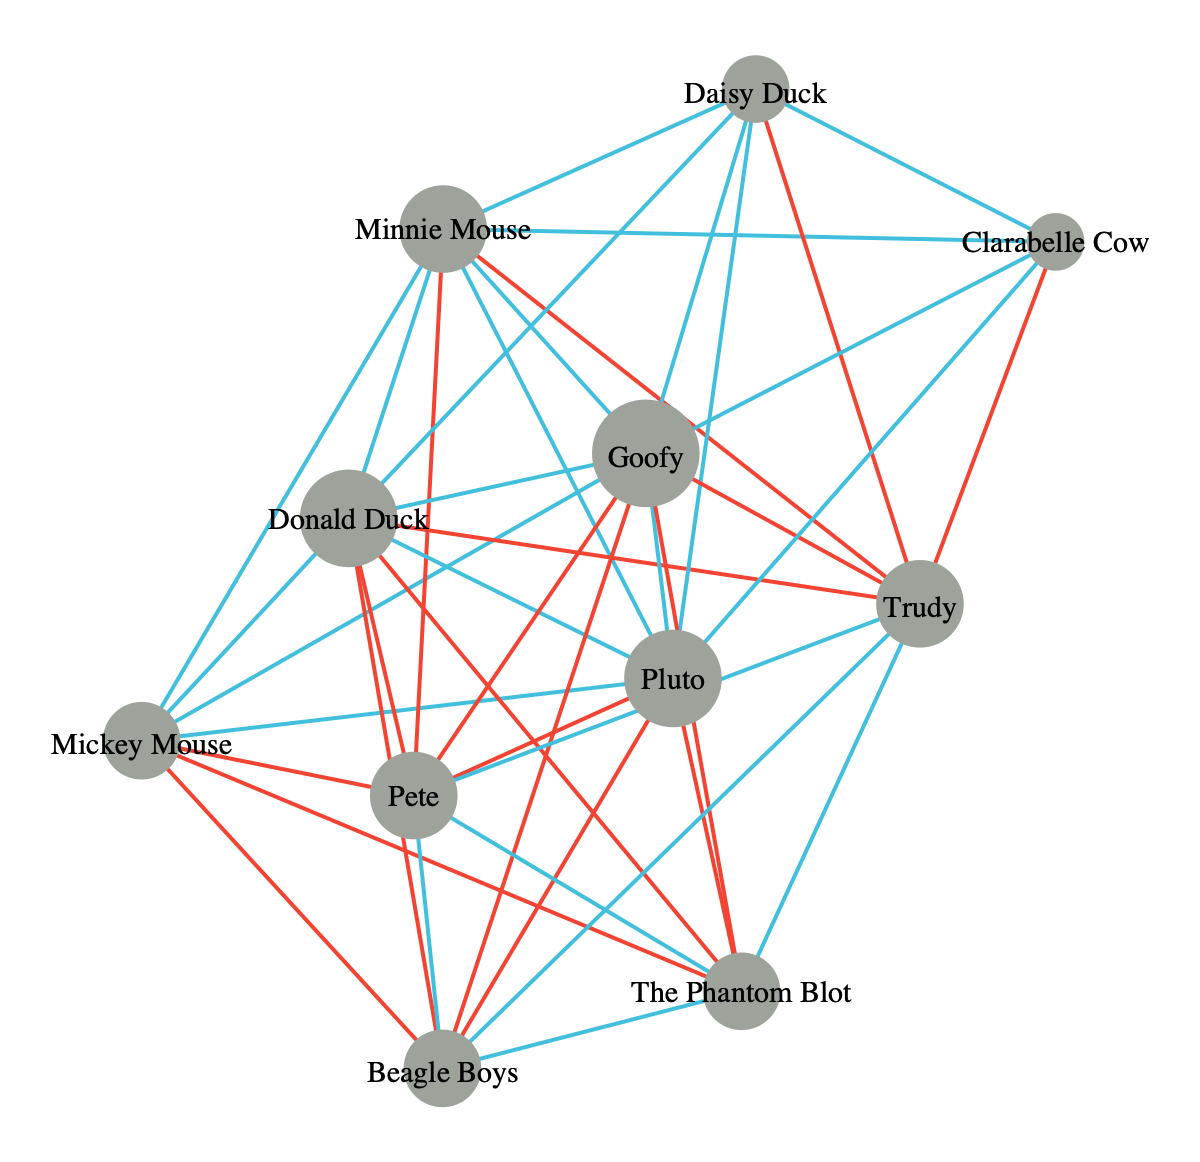

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x28b7c5090, at 0x287bc4a50>

In [13]:
gt.graph_draw(g_el,
              pos = pos,
              vertex_text = g_el.vp.node_id, 
              edge_color = g_el.ep.color, 
              vertex_size = deg_el,
              edge_pen_width = 2,
              vertex_text_position = -.5,
              vertex_font_size = 15,
              vertex_fill_color = '#9DA39A', 
              vertex_color = '#9DA39A')